## Airline Passenger Satisfaction - Tabular Dataset Classification

En este proyecto, se utilizará un conjunto de datos de vuelos comerciales que contiene información detallada sobre los pasajeros y su percepción respecto a diversos aspectos del servicio aéreo. El objetivo principal es analizar, visualizar y modelar la satisfacción de los pasajeros a partir de diferentes variables.

Fuente: _**[Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)**_

Utilizaremos 2 archivos:
- **Train**: `airline_passenger_satisfaction_train.csv`
- **Test**: `airline_passenger_satisfaction_test.csv`

Como en este proyecto ya tenemos la separación de **Train** y **Test** vamos primero a trabajar con el conjunto de **Train** y usaremos el conjunto de **Test** para calcular el rendimiento del modelo.

Información del **DataFrame**:

| Columna                              | Descripción                                                          |
|--------------------------------------|----------------------------------------------------------------------|
| **id**                               | Passenger ID number.                                                 |
| **Gender**                           | Gender of the passengers (Female, Male)                              |
| **Customer Type**                    | The customer type (Loyal customer, disloyal customer)                |
| **Age**                              | The actual age of the passengers                                     |
| **Type of Travel**                   | Purpose of the flight (Personal Travel, Business Travel)             |
| **Class**                            | Travel class in the plane (Business, Eco, Eco Plus)                  |
| **Flight distance**                  | The flight distance of this journey                                  |
| **Inflight wifi service**            | Satisfaction level of inflight wifi service (0: Not Applicable; 1-5) |
| **Departure/Arrival time convenient**| Satisfaction level of Departure/Arrival time convenience             |
| **Ease of Online booking**           | Satisfaction level of online booking                                 |
| **Gate location**                    | Satisfaction level of Gate location                                  |
| **Food and drink**                   | Satisfaction level of Food and drink                                 |
| **Online boarding**                  | Satisfaction level of online boarding                                |
| **Seat comfort**                     | Satisfaction level of Seat comfort                                   |
| **Inflight entertainment**           | Satisfaction level of Inflight entertainment                         |
| **On-board service**                 | Satisfaction level of On-board service                               |
| **Leg room service**                 | Satisfaction level of Leg room service                               |
| **Baggage handling**                 | Satisfaction level of Baggage handling                               |
| **Check-in service**                 | Satisfaction level of Check-in service                               |
| **Inflight service**                 | Satisfaction level of Inflight service                               |
| **Cleanliness**                      | Satisfaction level of Cleanliness                                    |
| **Departure Delay in Minutes**       | Minutes delayed at departure                                         |
| **Arrival Delay in Minutes**         | Minutes delayed at arrival                                           |
| **Satisfaction**                     | Airline satisfaction level (Satisfaction, Neutral or Dissatisfaction)|

#### 01. Exploratory Data Analysis

Usando el conjunto de **Train**, define una función que tome una columna del **DataFrame** y que represente con una gráfica su relación con la columna **target** (_Satisfaction_) usando _**sns.countplot()**_ o _**sns.boxplot()**_ dependiendo del tipo de dato de la columna.

#### 02. Procesamiento de Datos

Usando el conjunto de **Train**, usa transformaciones para representar cada columna de forma numérica:
- Tratamiento de **NaN's**.
- Tratamiento de outliers.
- Usa _**OneHotEncoder**_ para las columnas categóricas.
- Usa _**LabelEncoder**_ para la columna _**target**_.
- Muestra el mapa de correlaciones con el **DataFrame** ya transformado.

Usando los conjuntos de **Train** y **Test**:
- Aplica las mismas transformaciones al conjunto de **Test**. Usa los encoders ya entrenados y la misma estratégia para los NaN's. No elimines outliers de este conjunto.
- Define las variables: _**X_train**_, _**X_test**_, _**y_train**_, _**y_test**_
- Escala los datos del conjunto de **Train** con _**MinMaxScaler**_.
-  Escala los datos de **Test** con el escalador ya entrenado.

#### 03. Modelo de Clasificación (Machine Learning) y Métricas

- Entrena distintos modelos de clasificación usando _**X_train**_ e _**y_train**_ y calcula las métricas para cada modelo usando _**X_test**_ e _**y_test**_. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
- Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el método de _**.predict_proba()**_ con el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.

#### 04. Modelo de Clasificación (Deep Learning) y Métricas

- Define una Red Neuronal para clasificación binaria usando _**X_train**_ e _**y_train**_ y calcula las métricas de la red neuronal usando _**X_test**_ e _**y_test**_, la función de activación de la capa de salida debe de ser **Sigmoid**. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
- Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.

#### 05. Resultados

- ¿Cuál es la mejor métrica para este tipo de problema?
- ¿Que modelo de Machine Learning tiene mejor rendimiento?
- ¿Cuál es el mejor threshold para este modelo?
- ¿Es mejor el modelo de Deep Learning que los modelos de Machine Learning?
- ¿Cuál threshold es el mejor para el modelo de Deep Learning?

In [78]:
!pip install xgboost

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import xgboost as xgb

df_train = pd.read_csv(filepath_or_buffer = "../Data/airline_passenger_satisfaction_train.csv")
df_test = pd.read_csv(filepath_or_buffer = "../Data/airline_passenger_satisfaction_test.csv")

print(f"Train: {df_train.shape}, Test: {df_test.shape}")

Train: (103904, 24), Test: (25976, 24)


In [80]:
df_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [82]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

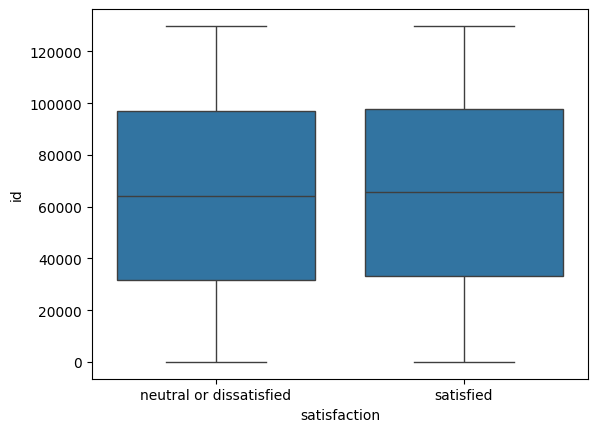

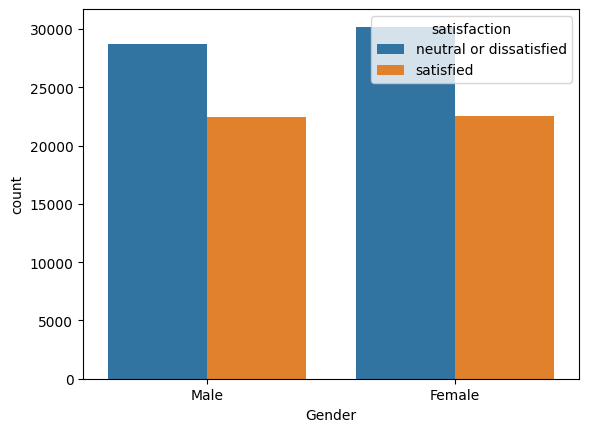

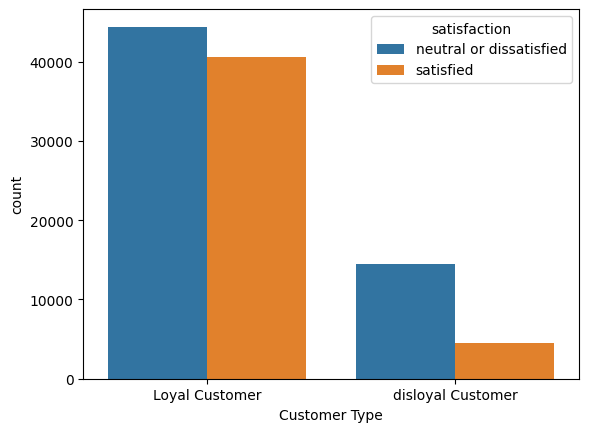

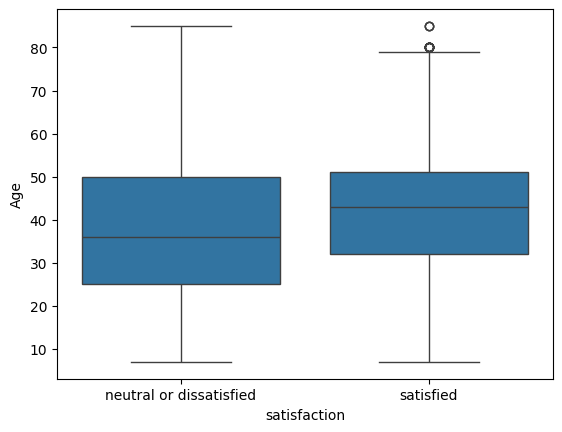

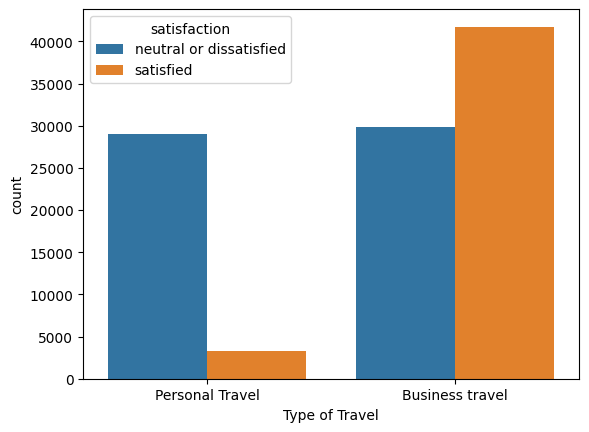

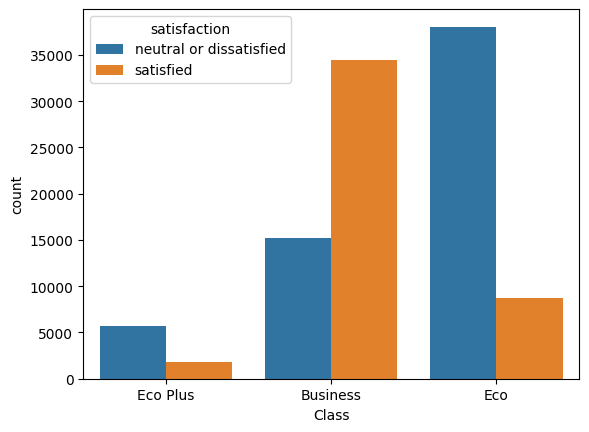

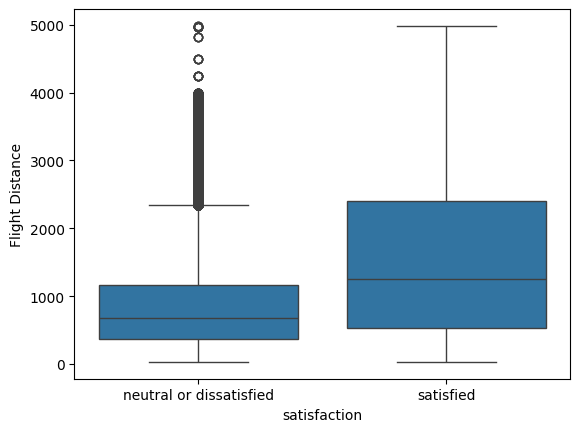

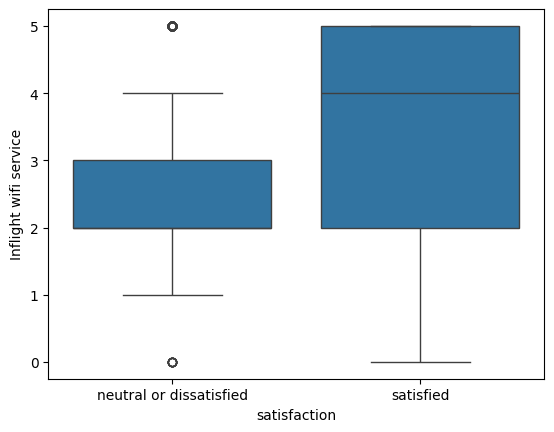

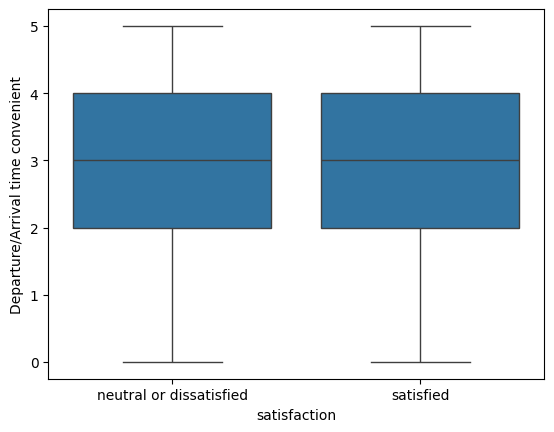

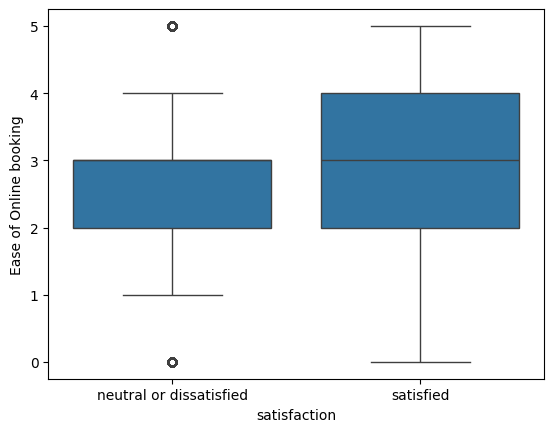

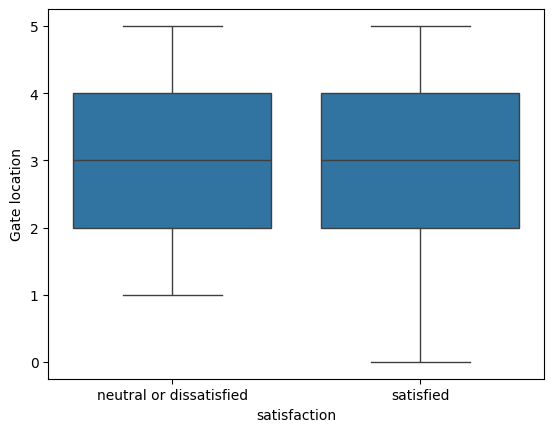

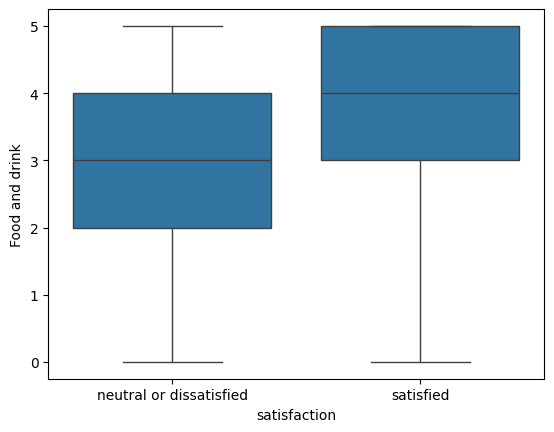

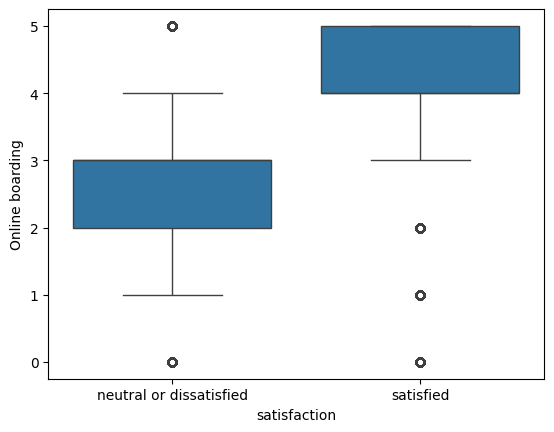

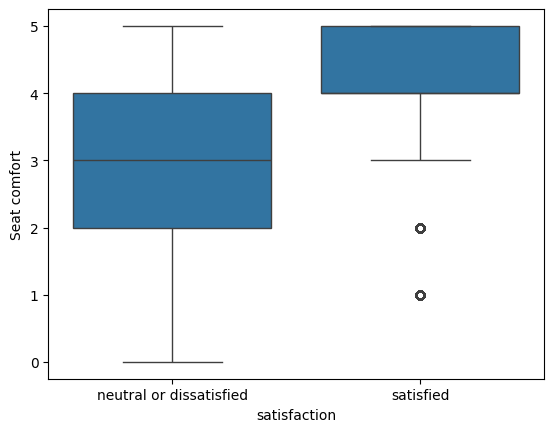

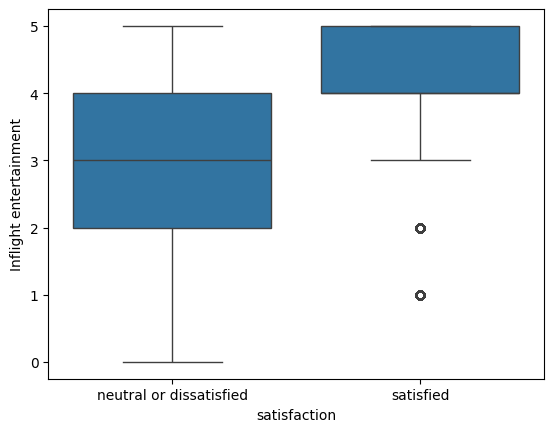

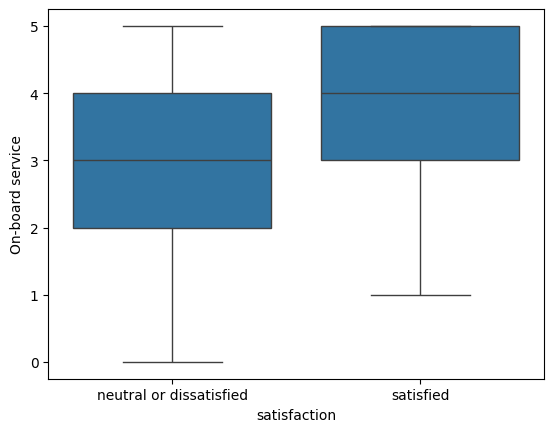

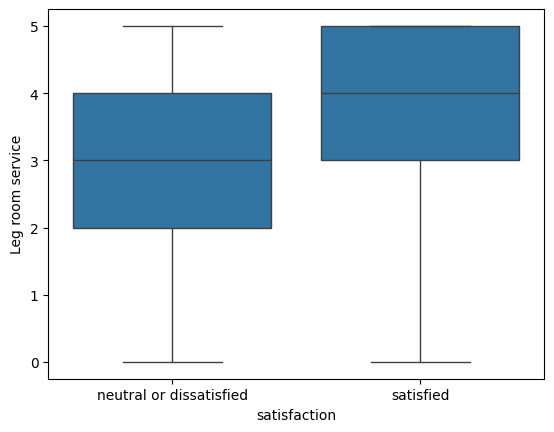

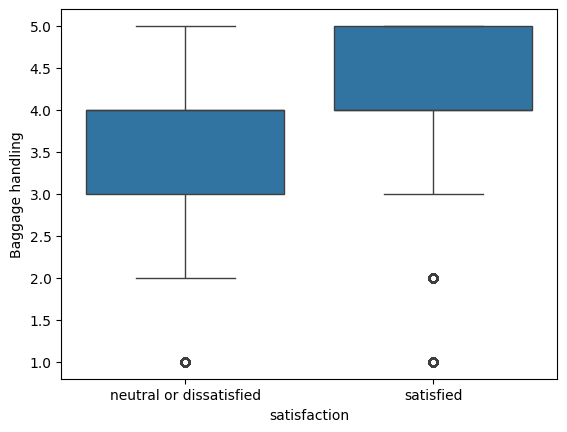

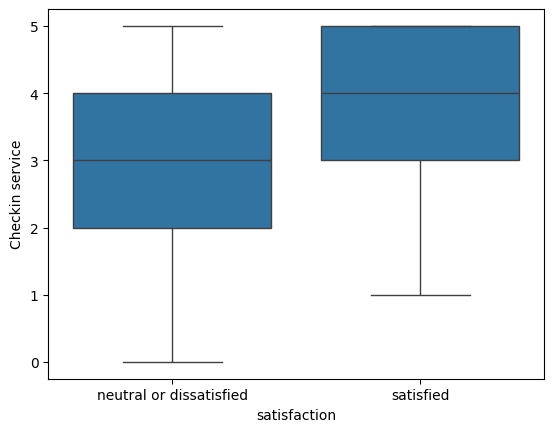

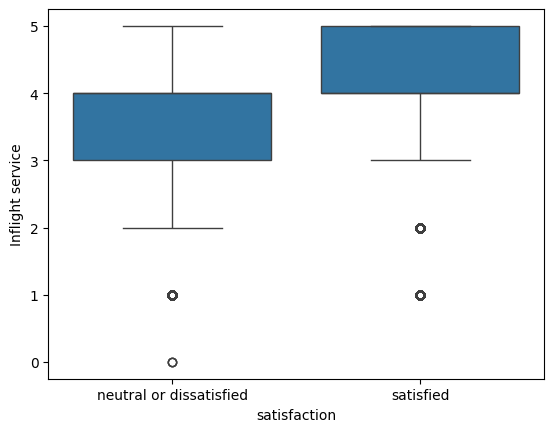

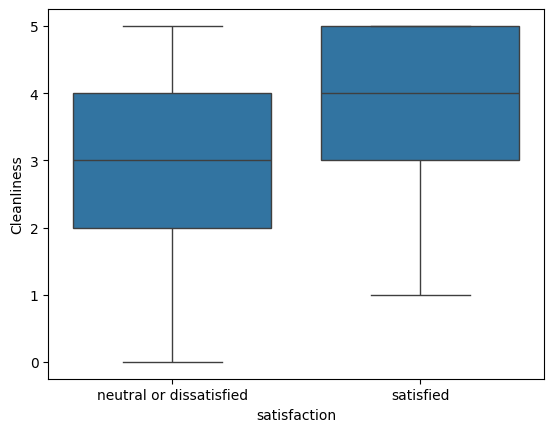

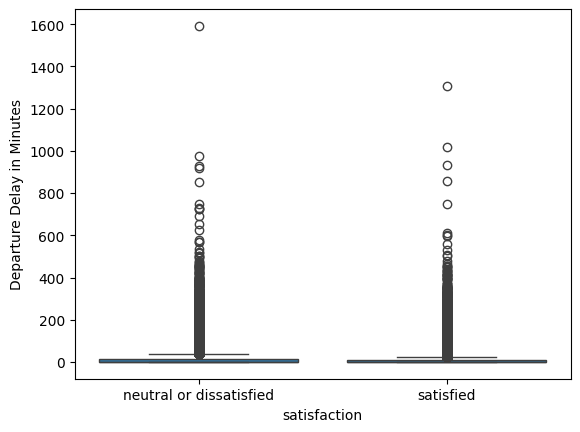

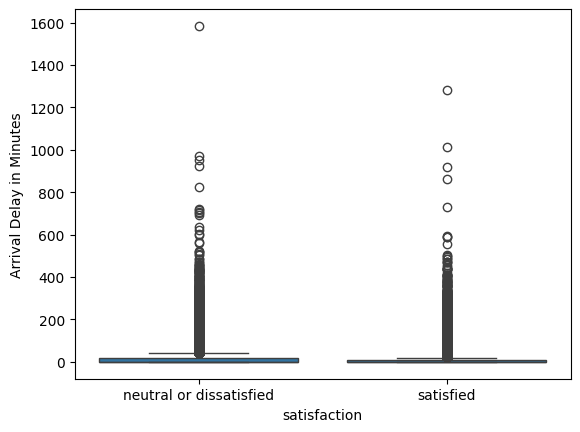

In [83]:
## 01. Exploratory Data Analysis

# Usando el conjunto de **Train**, define una función que tome una columna del **DataFrame** y que represente con una gráfica su relación con la columna **target** (_Satisfaction_) usando _**sns.countplot()**_ o _**sns.boxplot()**_ dependiendo del tipo de dato de la columna.

def satisfaction_relation (df_train, col, target = "satisfaction"):
    if df_train[col].dtype == "object":
        sns.countplot(df_train, x=col, hue = target)
    else:
        sns.boxplot(df_train, x = target, y = col)
    plt.show()

satisfaction_relation(df_train, "id")
satisfaction_relation(df_train, "Gender")
satisfaction_relation(df_train, "Customer Type")
satisfaction_relation(df_train, "Age")
satisfaction_relation(df_train, "Type of Travel")
satisfaction_relation(df_train, "Class")
satisfaction_relation(df_train, "Flight Distance")
satisfaction_relation(df_train, "Inflight wifi service")
satisfaction_relation(df_train, "Departure/Arrival time convenient")
satisfaction_relation(df_train, "Ease of Online booking")
satisfaction_relation(df_train, "Gate location")
satisfaction_relation(df_train, "Food and drink")
satisfaction_relation(df_train, "Online boarding")
satisfaction_relation(df_train, "Seat comfort")
satisfaction_relation(df_train, "Inflight entertainment")
satisfaction_relation(df_train, "On-board service")
satisfaction_relation(df_train, "Leg room service")
satisfaction_relation(df_train, "Baggage handling")
satisfaction_relation(df_train, "Checkin service")
satisfaction_relation(df_train, "Inflight service")
satisfaction_relation(df_train, "Cleanliness")
satisfaction_relation(df_train, "Departure Delay in Minutes")
satisfaction_relation(df_train, "Arrival Delay in Minutes")


In [84]:
## 02. Procesamiento de Datos

# Usando el conjunto de **Train**, usa transformaciones para representar cada columna de forma numérica:
    # Tratamiento de **NaN's**.
median_delay = df_train["Arrival Delay in Minutes"].median()
df_train["Arrival Delay in Minutes"].fillna(median_delay, inplace = True)

print(df_train.isna().sum())

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


C:\Users\csd\AppData\Local\Temp\ipykernel_200\2985073399.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Arrival Delay in Minutes"].fillna(median_delay, inplace = True)


In [85]:
    # Tratamiento de outliers.
def outliers_tukey(df, columna, k = 1.5):

    q1 = df[columna].quantile(q = 0.25) #primer cuartil (25% de los datos por debajo).
    q3 = df[columna].quantile(q = 0.75) #tercer cuartil (75% de los datos por debajo).
    iqr = q3 - q1 #rango intercuartílico, mide la dispersión central de los datos.

    lim_l = q1 - k*iqr #límites para considerar un valor como outlier.
    lim_r = q3 + k*iqr

    outliers = [x for x in df[columna] if x > lim_r or x < lim_l] #lista con los valores que están fuera de los límites.
    no_outlier = [x for x in df[columna] if x not in outliers] #lista con los valores que no son outliers (opcional, aunque no se usa fuera de la función).

    #Porcentaje de valores fuera de los límites respecto al total de filas.
    porcentaje_outliers = len(outliers)/df.shape[0]*100

    return porcentaje_outliers, lim_l, lim_r

cols_outliers = ["Age", "Flight Distance", "Inflight wifi service", "Ease of Online booking", "Online boarding", "Seat comfort", "Inflight entertainment", "Baggage handling", "Inflight service", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

for col in cols_outliers:
    porcentaje_ouliers, lim_l, lim_r = outliers_tukey(df_train, col)
    print(f"{col}: {porcentaje_ouliers:.2f}% outliers | Limite inferior: {lim_l} | Limite superior: {lim_r}")

df_clean = df_train.copy()

for col in cols_outliers:
    _, lim_l, lim_r = outliers_tukey(df_clean, col)
    df_clean = df_clean[df_clean[col].between(lim_l, lim_r)]

# Porcentaje de datos que queda tras eliminar outliers
print(f"Porcentaje de datos conservados: {df_clean.shape[0]/df_train.shape[0]*100:.2f}%")



Age: 0.00% outliers | Limite inferior: -9.0 | Limite superior: 87.0
Flight Distance: 2.20% outliers | Limite inferior: -1579.5 | Limite superior: 3736.5
Inflight wifi service: 0.00% outliers | Limite inferior: -1.0 | Limite superior: 7.0
Ease of Online booking: 0.00% outliers | Limite inferior: -1.0 | Limite superior: 7.0
Online boarding: 0.00% outliers | Limite inferior: -1.0 | Limite superior: 7.0
Seat comfort: 0.00% outliers | Limite inferior: -2.5 | Limite superior: 9.5
Inflight entertainment: 0.00% outliers | Limite inferior: -1.0 | Limite superior: 7.0
Baggage handling: 0.00% outliers | Limite inferior: 0.0 | Limite superior: 8.0
Inflight service: 0.00% outliers | Limite inferior: 0.0 | Limite superior: 8.0
Departure Delay in Minutes: 13.98% outliers | Limite inferior: -18.0 | Limite superior: 30.0
Arrival Delay in Minutes: 13.43% outliers | Limite inferior: -19.5 | Limite superior: 32.5
Porcentaje de datos conservados: 72.54%


In [86]:
df_clean

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [87]:
    # Usa _**OneHotEncoder**_ para las columnas categóricas.
cat_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
num_cols = [col for col in df_clean.columns if col not in cat_cols + ['satisfaction', 'id']]

ohe = OneHotEncoder()
x_cat = ohe.fit_transform(df_clean[cat_cols])
x_cat_df = pd.DataFrame(x_cat.toarray(), columns=ohe.get_feature_names_out(cat_cols)) 

x_df = pd.concat([df_clean[num_cols].reset_index(drop=True), x_cat_df], axis = 1)

In [88]:
    # Usa _**LabelEncoder**_ para la columna _**target**_.
le = LabelEncoder()
y = le.fit_transform(df_clean['satisfaction']) 
y_df = pd.DataFrame(y, columns= ["satisfaction"])

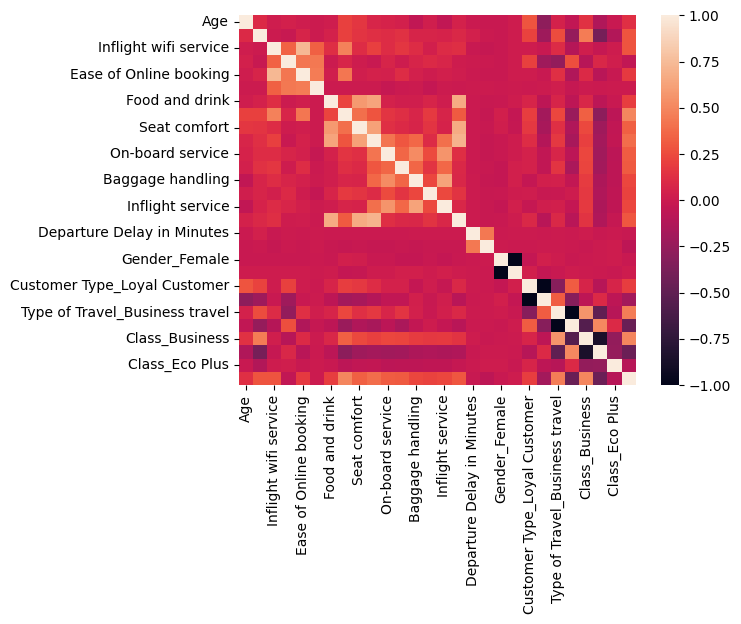

In [89]:
    # Muestra el mapa de correlaciones con el **DataFrame** ya transformado.
df_corr = pd.concat([x_df, y_df], axis=1)
corr = df_corr.corr()
sns.heatmap(corr)
plt.show()

In [90]:
# Usando los conjuntos de **Train** y **Test**:
    # Aplica las mismas transformaciones al conjunto de **Test**. Usa los encoders ya entrenados y la misma estratégia para los NaN's. No elimines outliers de este conjunto.
df_test["Arrival Delay in Minutes"].fillna(median_delay, inplace=True)
x_cat_test = ohe.transform(df_test[cat_cols])
x_cat_test_df = pd.DataFrame(x_cat_test.toarray(), columns=ohe.get_feature_names_out(cat_cols))
x_test_df = pd.concat([df_test[num_cols].reset_index(drop=True), x_cat_test_df], axis=1)
y_test = le.transform(df_test['satisfaction'])
y_test_df = pd.DataFrame(y_test, columns=["satisfaction"])

C:\Users\csd\AppData\Local\Temp\ipykernel_200\3839170940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Arrival Delay in Minutes"].fillna(median_delay, inplace=True)


In [91]:
    # Define las variables: _**X_train**_, _**X_test**_, _**y_train**_, _**y_test**_
X_train = x_df 
X_test = x_test_df
y_train = y_df 
y_test = y_test_df

In [92]:
    # Escala los datos del conjunto de **Train** con _**MinMaxScaler**_.
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)


In [93]:
    # Escala los datos de **Test** con el escalador ya entrenado.

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [94]:
## 03. Modelo de Clasificación (Machine Learning) y Métricas

# Entrena distintos modelos de clasificación usando _**X_train**_ e _**y_train**_ y calcula las métricas para cada modelo usando _**X_test**_ e _**y_test**_. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
metricas = list()

modelos = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

for modelo in modelos:
    modelo.fit(X_train, y_train)

    yhat = modelo.predict(X_test)
    yhat_proba = modelo.predict_proba(X_test)

    acc = accuracy_score(y_test, yhat)
    rec = recall_score(y_test, yhat)
    pre = precision_score(y_test, yhat)
    f1_ = f1_score(y_test, yhat)
    roc = roc_auc_score(y_test, yhat_proba[:, 1])

    metricas.append([str(modelo), acc, rec, pre, f1_, roc])

df_metricas = pd.DataFrame(data = metricas,
                           columns = ["modelo", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_metricas

c:\Users\csd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\csd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\csd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_

,modelo,accuracy,recall,precision,f1_score,roc_auc
0,LogisticRegression(),0.785918,0.690783,0.794693,0.739104,0.817133
1,KNeighborsClassifier(),0.745265,0.662019,0.732060,0.695280,0.800061
2,DecisionTreeClassifier(),0.943178,0.941156,0.930224,0.935658,0.942958
3,RandomForestClassifier(),0.962042,0.942647,0.970039,0.956147,0.993137


In [95]:
# Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el método de _**.predict_proba()**_ con el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.
data = list()

modelo = xgb.XGBClassifier()
modelo.fit(X_train, y_train)

yhat_proba = modelo.predict_proba(X_test)

for thresh in np.arange(0.00, 1.00, 0.001):
    
    yhat_thresh = (yhat_proba[:, 1] >= thresh).astype(int)

    acc = accuracy_score(y_test, yhat_thresh)
    rec = recall_score(y_test, yhat_thresh)
    pre = precision_score(y_test, yhat_thresh)
    f1_ = f1_score(y_test, yhat_thresh)
    roc = roc_auc_score(y_test, yhat_thresh)

    data.append([thresh, acc, rec, pre, f1_, roc])

df_thresh = pd.DataFrame(data = data,
                         columns = ["thresh", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_thresh

,thresh,accuracy,recall,precision,f1_score,roc_auc
0,0.000,0.438982,1.000000,0.438982,0.610129,0.500000
1,0.001,0.735679,1.000000,0.624172,0.768603,0.764427
2,0.002,0.776370,1.000000,0.662503,0.796995,0.800693
3,0.003,0.795966,0.999912,0.682714,0.811415,0.818147
4,0.004,0.808554,0.999912,0.696348,0.820967,0.829367
...,...,...,...,...,...,...
995,0.995,0.898214,0.768219,0.999886,0.868875,0.884075
996,0.996,0.892439,0.755064,0.999884,0.860398,0.877498
997,0.997,0.884663,0.737350,0.999881,0.848779,0.868641
998,0.998,0.872036,0.708585,0.999876,0.829398,0.854258


In [100]:
## 04. Modelo de Clasificación (Deep Learning) y Métricas

# Define una Red Neuronal para clasificación binaria usando _**X_train**_ e _**y_train**_ y calcula las métricas de la red neuronal usando _**X_test**_ e _**y_test**_, la función de activación de la capa de salida debe de ser **Sigmoid**. Guarda el resultado de las métricas en un **DataFrame** para hacer comparaciones.
# Clase del modelo
model = Sequential()

# Capa de entrada
model.add(Input(shape = X_train.shape[1:]))

# Capas ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))

# Capa de salida
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

model.compile(loss = BinaryCrossentropy(),
              optimizer = Adam(),
              metrics = [BinaryAccuracy()])

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 5,
                    verbose = 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 48,385 (189.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - binary_accuracy: 0.7395 - loss: 0.7821 - val_binary_accuracy: 0.7957 - val_loss: 0.5975
Epoch 2/5
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8361 - loss: 0.3970 - val_binary_accuracy: 0.8288 - val_loss: 0.5889
Epoch 3/5
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8521 - loss: 0.3590 - val_binary_accuracy: 0.6597 - val_loss: 1.1564
Epoch 4/5
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8602 - loss: 0.3386 - val_binary_accuracy: 0.8440 - val_loss: 0.5371
Epoch 5/5
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8784 - loss: 0.2946 - val_binary_accuracy: 0.8571 - val_loss: 0.4269


In [101]:
# Define distintos **thresholds** (umbrales) y calcula las métricas para cada **threshold** usando el conjunto de **Test**. Guarda estos resultados en un **Dataframe** para hacer comparaciones.
data = list()

yhat_proba = model.predict(X_test)

for thresh in np.arange(0.00, 1.00, 0.001):
    
    yhat_thresh = (yhat_proba >= thresh).astype(int)

    acc = accuracy_score(y_test, yhat_thresh)
    rec = recall_score(y_test, yhat_thresh)
    pre = precision_score(y_test, yhat_thresh)
    f1_ = f1_score(y_test, yhat_thresh)
    roc = roc_auc_score(y_test, yhat_thresh)

    data.append([thresh, acc, rec, pre, f1_, roc])

df_thresh = pd.DataFrame(data = data,
                         columns = ["thresh", "accuracy", "recall", "precision", "f1_score", "roc_auc"])

df_thresh

812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,thresh,accuracy,recall,precision,f1_score,roc_auc
0,0.000,0.438982,1.000000,0.438982,0.610129,0.500000
1,0.001,0.443024,0.985092,0.439975,0.608274,0.501981
2,0.002,0.457268,0.976673,0.446033,0.612394,0.513760
3,0.003,0.473360,0.970359,0.453354,0.617984,0.527415
4,0.004,0.494033,0.966412,0.463415,0.626439,0.545410
...,...,...,...,...,...,...
995,0.995,0.596936,0.084276,0.971689,0.155100,0.541177
996,0.996,0.586618,0.060598,0.963738,0.114026,0.529407
997,0.997,0.578419,0.041743,0.952000,0.079980,0.520048
998,0.998,0.570873,0.024467,0.923841,0.047672,0.511444


In [99]:
##############################################################################################################################